In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [5]:
dat = pd.read_csv("~/Desktop/cleaned_bike_data_2019.csv")
dat = dat.dropna()
dat.columns

/Users/zhuohenghan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['Unnamed: 0', 'station_id', 'num_arrivals', 'Start_day', 'start_hour',
       'num_depart', 'diff', 'station_name', 'longitude', 'latitude',
       'region_name', 'total_capacity', 'cumu_sum', 'percent_full',
       'weekday_num', 'weekend_flag', 'PRCP', 'SNOW', 'TAVG', 'TMAX', 'TMIN',
       'holiday'],
      dtype='object')

In [8]:
# We choose these variables to do some further analysis
df = dat[['station_id', 'percent_full', 'start_hour', 'weekday_num', 'PRCP', 'SNOW', 'TAVG', 'holiday']]
df

,station_id,percent_full,start_hour,weekday_num,PRCP,SNOW,TAVG,holiday
0,31000,0.357143,23,0,0.53,0.0,37,False
1,31000,0.214286,9,2,0.00,0.0,43,False
2,31000,0.285714,11,2,0.00,0.0,43,False
3,31000,0.214286,12,2,0.00,0.0,43,False
4,31000,0.285714,17,2,0.00,0.0,43,False
...,...,...,...,...,...,...,...,...
1543939,32609,0.250000,13,3,0.00,0.0,38,False
1543940,32609,0.250000,11,5,0.00,0.0,47,False
1543941,32609,0.416667,13,5,0.00,0.0,47,False
1543942,32609,0.250000,14,5,0.00,0.0,47,False


In [9]:
# Change to categorical variables
df.loc[df['weekday_num'] == 0, 'week'] = 'Mon'
df.loc[df['weekday_num'] == 1, 'week'] = 'Tue'
df.loc[df['weekday_num'] == 2, 'week'] = 'Wed'
df.loc[df['weekday_num'] == 3, 'week'] = 'Thu'
df.loc[df['weekday_num'] == 4, 'week'] = 'Fri'
df.loc[df['weekday_num'] == 5, 'week'] = 'Sat'
df.loc[df['weekday_num'] == 6, 'week'] = 'Sun'

/Users/zhuohenghan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/zhuohenghan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/zhuohenghan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [10]:
# Change to categorical variables
df.loc[df['holiday'] == False, 'holiday'] = 'No'
df.loc[df['holiday'] == True, 'holiday'] = 'Yes'

/Users/zhuohenghan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [12]:
np.random.seed(10)

# Model prediction for each station id

def mse(station_id):
    df_new = df[df['station_id'] == station_id] # Choose the station
    df_new = df_new.drop(columns=['station_id', 'weekday_num']) # Drop these two columns for model building 
    
    df_new = pd.get_dummies(df_new) # Deal with dummy variables like week and holiday
    
    X = df_new[df_new.columns[1:-1]].values # Choose all avriables except bike availability percentage 
    Y_reg = df_new.iloc[:, 0].values # Choose bike availability percentage

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y_reg, test_size = 0.2, random_state = 1) # Split train and test
    
    rf = RandomForestRegressor() # Apply RF Regression
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)
    
    return mean_squared_error(Y_pred,Y_test)

In [13]:
# See how many data are included for each station
c = df.groupby(["station_id"]).count() 

In [14]:
# Sort by count
c.sort_values(by=['percent_full'])

,percent_full,start_hour,weekday_num,PRCP,SNOW,TAVG,holiday,week
station_id,,,,,,,,
31718,1,1,1,1,1,1,1,1
31825,4,4,4,4,4,4,4,4
31824,9,9,9,9,9,9,9,9
31717,37,37,37,37,37,37,37,37
32423,42,42,42,42,42,42,42,42
...,...,...,...,...,...,...,...,...
31200,7208,7208,7208,7208,7208,7208,7208,7208
31201,7221,7221,7221,7221,7221,7221,7221,7221
31266,7318,7318,7318,7318,7318,7318,7318,7318


In [15]:
# Get unique station id
station_ids = df.station_id.unique()

In [16]:
# Remove those stations with counts < 30 based on CLT
station_ids = station_ids.tolist()
station_ids.remove(31718)
station_ids.remove(31825)
station_ids.remove(31824)

In [17]:
# Get MSE values
mse_scores = []
for i in range(len(station_ids)):
    mse_scores.append(mse(station_ids[i]))

In [18]:
np.mean(mse_scores)

0.029392918699773788

In [19]:
min(mse_scores)

0.0038882733148661148

In [20]:
station_ids[mse_scores.index(min(mse_scores))]

32419

In [21]:
max(mse_scores)

0.1010579752775352

In [22]:
station_ids[mse_scores.index(max(mse_scores))]

31504

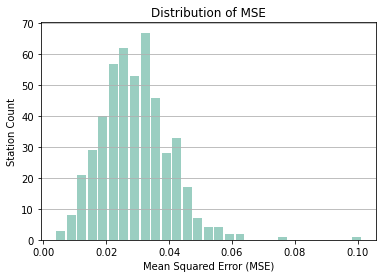

In [24]:
# Plot MSE distribution
fig = plt.figure()
plt.hist(mse_scores, bins='auto', color='#6FBAA7',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y')
plt.title("Distribution of MSE")
plt.xlabel("Mean Squared Error (MSE)")
plt.ylabel("Station Count")
plt.show()
fig.savefig('MSE.png')

In [75]:
# Check the top 10 least MSE 

MSE_df = pd.DataFrame([station_ids, mse_scores]).T
MSE_df.columns = ['Station_ids','MSE']
MSE_df.sort_values(by=['MSE']).head(10)

,Station_ids,MSE
470,32419.0,0.003888
332,31819.0,0.005857
381,32041.0,0.005905
445,32230.0,0.00854
353,32004.0,0.008775
474,32423.0,0.009079
416,32084.0,0.009351
235,31521.0,0.009361
354,32005.0,0.009668
360,32011.0,0.009714


In [79]:
# See the importance feature

df_new = df[df['station_id'] == 32419]
df_new = df_new.drop(columns=['station_id', 'weekday_num'])

df_new = pd.get_dummies(df_new)
df_new

X = df_new[df_new.columns[1:-1]].values
Y_reg = df_new.iloc[:, 0].values

rf = RandomForestRegressor()
rf.fit(X, Y_reg)
Y_pred = rf.predict(X)
feature = []
features = rf.feature_importances_
features

array([0.21803036, 0.04188773, 0.        , 0.59298547, 0.00614941,
       0.00208651, 0.01982722, 0.01014309, 0.06337032, 0.00963306,
       0.01570292, 0.0201839 ])

In [80]:
# Order by difference between prediction and true 
df_new['Pred'] = Y_pred.tolist()
df_new['Diff'] = np.abs(df_new['Pred']-df_new['percent_full'])
df_new.sort_values(by=['Diff']).head(10)

,percent_full,start_hour,PRCP,SNOW,TAVG,holiday_No,holiday_Yes,week_Fri,week_Mon,week_Sat,week_Sun,week_Thu,week_Tue,week_Wed,Pred,Diff
1537638,0.210526,14,0.00,0.0,35,0,1,0,0,0,0,0,0,1,0.210000,0.000526
1537597,0.157895,17,0.00,0.0,74,1,0,0,1,0,0,0,0,0,0.157368,0.000526
1537623,0.052632,12,0.37,0.0,60,1,0,0,0,0,0,0,0,1,0.053684,0.001053
1537625,0.157895,23,0.00,0.0,51,1,0,1,0,0,0,0,0,0,0.155789,0.002105
1537608,0.105263,11,0.00,0.0,66,1,0,0,0,0,0,0,0,1,0.102632,0.002632
1537633,0.210526,10,0.00,0.0,37,1,0,1,0,0,0,0,0,0,0.213158,0.002632
1537600,0.157895,19,0.00,0.0,71,1,0,1,0,0,0,0,0,0,0.162105,0.004211
1537601,0.157895,14,0.00,0.0,73,1,0,0,1,0,0,0,0,0,0.162105,0.004211
1537619,0.052632,11,1.04,0.0,57,1,0,0,0,0,0,0,0,1,0.047895,0.004737
1537629,0.210526,15,0.00,0.0,49,1,0,0,0,0,0,0,1,0,0.204211,0.006316


In [82]:
df_new = df[df['station_id'] == 31819]
df_new = df_new.drop(columns=['station_id', 'weekday_num'])

df_new = pd.get_dummies(df_new)
df_new

X = df_new[df_new.columns[1:-1]].values
Y_reg = df_new.iloc[:, 0].values

rf = RandomForestRegressor()
rf.fit(X, Y_reg)
Y_pred = rf.predict(X)
feature = []
features = rf.feature_importances_
features

array([0.22195412, 0.05909494, 0.        , 0.42726862, 0.00104689,
       0.00122614, 0.11807704, 0.02110742, 0.0522588 , 0.02785345,
       0.01872428, 0.05138829])

In [83]:
df_new['Pred'] = Y_pred.tolist()
df_new['Diff'] = np.abs(df_new['Pred']-df_new['percent_full'])
df_new.sort_values(by=['Diff']).head(10)

,percent_full,start_hour,PRCP,SNOW,TAVG,holiday_No,holiday_Yes,week_Fri,week_Mon,week_Sat,week_Sun,week_Thu,week_Tue,week_Wed,Pred,Diff
1411997,0.105263,20,0.00,0.0,42,1,0,0,0,0,1,0,0,0,0.105263,1.387779e-17
1412068,0.105263,17,0.00,0.0,59,1,0,0,0,1,0,0,0,0,0.105789,5.263158e-04
1412059,0.210526,14,0.00,0.0,73,1,0,0,1,0,0,0,0,0,0.210000,5.263158e-04
1412032,0.157895,7,0.00,0.0,81,1,0,0,0,0,0,1,0,0,0.157368,5.263158e-04
1412005,0.105263,16,0.10,0.0,64,1,0,0,0,0,0,1,0,0,0.104211,1.052632e-03
1412044,0.263158,16,0.00,0.0,80,1,0,0,0,1,0,0,0,0,0.264211,1.052632e-03
1412054,0.210526,16,0.00,0.0,74,1,0,0,1,0,0,0,0,0,0.208421,2.105263e-03
1412001,0.105263,17,0.07,0.0,66,1,0,0,0,0,1,0,0,0,0.102105,3.157895e-03
1411999,0.105263,18,0.00,0.0,39,1,0,0,0,0,0,0,0,1,0.108947,3.684211e-03
1412033,0.210526,16,0.00,0.0,81,1,0,0,0,0,0,1,0,0,0.206842,3.684211e-03


In [84]:
df_new = df[df['station_id'] == 32041]
df_new = df_new.drop(columns=['station_id', 'weekday_num'])

df_new = pd.get_dummies(df_new)
df_new

X = df_new[df_new.columns[1:-1]].values
Y_reg = df_new.iloc[:, 0].values

rf = RandomForestRegressor()
rf.fit(X, Y_reg)
Y_pred = rf.predict(X)
feature = []
features = rf.feature_importances_
features

array([0.29772059, 0.06361879, 0.        , 0.42161207, 0.00077978,
       0.00043499, 0.03307269, 0.02746213, 0.03304914, 0.03442978,
       0.02274128, 0.06507876])

In [85]:
df_new['Pred'] = Y_pred.tolist()
df_new['Diff'] = np.abs(df_new['Pred']-df_new['percent_full'])
df_new.sort_values(by=['Diff']).head(10)

,percent_full,start_hour,PRCP,SNOW,TAVG,holiday_No,holiday_Yes,week_Fri,week_Mon,week_Sat,week_Sun,week_Thu,week_Tue,week_Wed,Pred,Diff
1480192,0.133333,18,0.00,0.0,64,1,0,0,1,0,0,0,0,0,0.133333,2.220446e-16
1480196,0.200000,13,0.50,0.0,51,1,0,0,1,0,0,0,0,0,0.200000,3.885781e-16
1480242,0.333333,8,0.00,0.0,81,1,0,1,0,0,0,0,0,0,0.334000,6.666667e-04
1480190,0.133333,19,0.58,0.0,66,1,0,0,0,0,0,1,0,0,0.134000,6.666667e-04
1480194,0.200000,15,0.00,0.0,66,1,0,0,0,0,0,0,0,1,0.198667,1.333333e-03
1480241,0.266667,7,0.39,0.0,77,1,0,0,0,0,0,0,0,1,0.265333,1.333333e-03
1480216,0.133333,21,0.12,0.0,65,1,0,0,1,0,0,0,0,0,0.135333,2.000000e-03
1480243,0.266667,13,0.00,0.0,81,1,0,1,0,0,0,0,0,0,0.263333,3.333333e-03
1480273,0.133333,9,0.00,0.0,56,1,0,0,0,1,0,0,0,0,0.129333,4.000000e-03
1480296,0.266667,8,0.00,0.0,32,1,0,0,0,0,0,1,0,0,0.271333,4.666667e-03


In [88]:
df_new = df[df['station_id'] == 32230]
df_new = df_new.drop(columns=['station_id', 'weekday_num'])

df_new = pd.get_dummies(df_new)
df_new

X = df_new[df_new.columns[1:-1]].values
Y_reg = df_new.iloc[:, 0].values

rf = RandomForestRegressor()
rf.fit(X, Y_reg)
Y_pred = rf.predict(X)
feature = []
features = rf.feature_importances_
features

array([0.18522528, 0.09379134, 0.00359234, 0.57266414, 0.00176611,
       0.00185829, 0.02195728, 0.02905834, 0.00118184, 0.01895387,
       0.03104742, 0.03890372])

In [89]:
df_new['Pred'] = Y_pred.tolist()
df_new['Diff'] = np.abs(df_new['Pred']-df_new['percent_full'])
df_new.sort_values(by=['Diff']).head(10)

,percent_full,start_hour,PRCP,SNOW,TAVG,holiday_No,holiday_Yes,week_Fri,week_Mon,week_Sat,week_Sun,week_Thu,week_Tue,week_Wed,Pred,Diff
1526563,0.105263,17,0.00,0.0,48,1,0,0,0,0,0,0,0,1,0.105263,1.387779e-17
1526475,0.368421,21,0.00,0.0,74,1,0,0,0,0,1,0,0,0,0.368421,2.775558e-16
1526495,0.157895,10,0.00,0.0,62,1,0,1,0,0,0,0,0,0,0.158421,5.263158e-04
1526416,0.263158,8,0.00,0.0,85,1,0,1,0,0,0,0,0,0,0.262368,7.894737e-04
1526498,0.157895,9,0.00,0.0,80,1,0,0,1,0,0,0,0,0,0.158684,7.894737e-04
1526381,0.105263,18,0.27,0.0,69,1,0,0,0,0,0,1,0,0,0.106316,1.052632e-03
1526486,0.315789,8,0.00,0.0,73,1,0,0,1,0,0,0,0,0,0.317193,1.403509e-03
1526559,0.052632,17,0.00,0.0,49,1,0,0,0,0,0,0,1,0,0.051053,1.578947e-03
1526569,0.210526,19,0.00,0.0,44,1,0,0,0,0,0,0,1,0,0.212105,1.578947e-03
1526504,0.157895,17,0.00,0.0,66,1,0,0,0,0,0,0,0,1,0.156316,1.578947e-03


In [90]:
df_new = df[df['station_id'] == 32004]
df_new = df_new.drop(columns=['station_id', 'weekday_num'])

df_new = pd.get_dummies(df_new)
df_new

X = df_new[df_new.columns[1:-1]].values
Y_reg = df_new.iloc[:, 0].values

rf = RandomForestRegressor()
rf.fit(X, Y_reg)
Y_pred = rf.predict(X)
feature = []
features = rf.feature_importances_
features

array([0.22661101, 0.09857061, 0.        , 0.45570268, 0.00418473,
       0.00593521, 0.04166315, 0.04563843, 0.0409577 , 0.02291108,
       0.02458962, 0.03323577])

In [91]:
df_new['Pred'] = Y_pred.tolist()
df_new['Diff'] = np.abs(df_new['Pred']-df_new['percent_full'])
df_new.sort_values(by=['Diff']).head(10)

,percent_full,start_hour,PRCP,SNOW,TAVG,holiday_No,holiday_Yes,week_Fri,week_Mon,week_Sat,week_Sun,week_Thu,week_Tue,week_Wed,Pred,Diff
1447149,0.210526,17,0.00,0.0,52,1,0,0,0,0,0,1,0,0,0.210877,0.000351
1447047,0.263158,19,0.00,0.0,82,1,0,0,0,0,0,0,1,0,0.262632,0.000526
1447051,0.210526,7,0.00,0.0,75,1,0,1,0,0,0,0,0,0,0.211053,0.000526
1447106,0.157895,8,0.00,0.0,71,1,0,1,0,0,0,0,0,0,0.157368,0.000526
1446931,0.157895,17,0.05,0.0,59,1,0,0,0,1,0,0,0,0,0.158947,0.001053
1447145,0.157895,13,0.00,0.0,57,1,0,0,0,0,0,0,1,0,0.158947,0.001053
1446985,0.263158,18,0.36,0.0,76,1,0,0,0,0,0,0,1,0,0.262105,0.001053
1447161,0.263158,17,1.35,0.0,67,1,0,0,0,0,0,1,0,0,0.264211,0.001053
1446979,0.315789,17,0.05,0.0,72,1,0,0,0,1,0,0,0,0,0.314737,0.001053
1446883,0.315789,18,0.01,0.0,59,1,0,0,0,0,1,0,0,0,0.314737,0.001053
